# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
data=pd.read_csv('train.csv')
data.pop('date')
center=pd.read_csv('fulfilment_center_info.csv')
meal=pd.read_csv('meal_info.csv')

In [4]:
test=pd.read_csv('test_QoiMO9B.csv')

In [5]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
data_size = data.shape[0]
test_size = test.shape[0]
print('train file contain :', data_size,'records','\ntest file contain :', test_size,'records')

train file contain : 456548 records 
test file contain : 32573 records


In [7]:
combin = pd.concat([data,test], axis=0)
combin.size

4402089

In [8]:
combin = pd.merge(combin, center, on='center_id', how='left')

In [9]:
combin = pd.merge(combin, meal, on='meal_id', how='left')

In [10]:
combin.sample(5)

,base_price,center_id,checkout_price,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,week,city_code,region_code,center_type,op_area,category,cuisine
463638,485.03,89,484.03,0,0,1165133,2126,NaN,148,703,56,TYPE_A,4.8,Pasta,Italian
164135,339.53,39,242.50,0,0,1294215,2306,53.0,55,526,34,TYPE_C,3.8,Pasta,Italian
480725,173.63,75,155.26,0,0,1470343,1778,NaN,153,651,77,TYPE_B,4.7,Beverages,Italian
350310,290.03,53,291.03,0,0,1495231,2577,121.0,113,590,56,TYPE_A,3.8,Starters,Thai
110544,484.03,53,485.03,0,0,1154804,1543,41.0,38,590,56,TYPE_A,3.8,Desert,Indian


In [11]:
combin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 15 columns):
base_price               489121 non-null float64
center_id                489121 non-null int64
checkout_price           489121 non-null float64
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
id                       489121 non-null int64
meal_id                  489121 non-null int64
num_orders               456548 non-null float64
week                     489121 non-null int64
city_code                489121 non-null int64
region_code              489121 non-null int64
center_type              489121 non-null object
op_area                  489121 non-null float64
category                 489121 non-null object
cuisine                  489121 non-null object
dtypes: float64(4), int64(8), object(3)
memory usage: 59.7+ MB


# Fearture Engineering

In [12]:
#Discount Amount
combin['discount amount'] = combin['base_price'] - combin['checkout_price']

In [13]:
combin['discount y/n'] = [1 if x > 0 else 0 for x in combin['discount amount']]

In [14]:
combin['discount percent'] = ((combin['discount amount'])/combin['base_price'])*100

In [15]:
#combin.groupby(['center_id','meal_id','week',]).count()
combin = combin.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [16]:
#combin[(combin['meal_id']==1062) & (combin['center_id']==10)]
#combin[(combin['meal_id']==1109) & (combin['center_id']==10)]['checkout_price'].shift(1) - combin[(combin['meal_id']==1109) & (combin['center_id']==10)]['checkout_price']

In [17]:
np.sort(center['center_id'].unique())

array([ 10,  11,  13,  14,  17,  20,  23,  24,  26,  27,  29,  30,  32,
        34,  36,  39,  41,  42,  43,  50,  51,  52,  53,  55,  57,  58,
        59,  61,  64,  65,  66,  67,  68,  72,  73,  74,  75,  76,  77,
        80,  81,  83,  86,  88,  89,  91,  92,  93,  94,  97,  99, 101,
       102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137, 139,
       143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186],
      dtype=int64)

In [18]:
np.sort(meal['meal_id'].unique())

array([1062, 1109, 1198, 1207, 1216, 1230, 1247, 1248, 1311, 1438, 1445,
       1525, 1543, 1558, 1571, 1727, 1754, 1770, 1778, 1803, 1847, 1878,
       1885, 1902, 1962, 1971, 1993, 2104, 2126, 2139, 2290, 2304, 2306,
       2322, 2444, 2490, 2492, 2494, 2539, 2569, 2577, 2581, 2631, 2640,
       2664, 2704, 2707, 2760, 2826, 2867, 2956], dtype=int64)

In [19]:
combin['compare_week_price'] = combin['checkout_price'] - combin['checkout_price'].shift(1)

In [20]:
combin['compare_week_price'][combin['week']==1] = 0

In [21]:
combin['weekly_price_rise y/n'] = [1 if x > 0 else 0 for x in combin['compare_week_price']]

In [22]:
combin.head(155)

,base_price,center_id,checkout_price,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,week,city_code,region_code,center_type,op_area,category,cuisine,discount amount,discount y/n,discount percent,compare_week_price,weekly_price_rise y/n
0,181.39,10,181.39,0,0,1436842,1062,865.0,1,590,56,TYPE_B,6.3,Beverages,Italian,0.00,0,0.000000,0.00,0
1,182.36,10,183.36,0,0,1205013,1062,782.0,2,590,56,TYPE_B,6.3,Beverages,Italian,-1.00,0,-0.548366,1.97,1
2,182.36,10,184.36,0,0,1447751,1062,851.0,3,590,56,TYPE_B,6.3,Beverages,Italian,-2.00,0,-1.096732,1.00,1
3,183.36,10,182.36,0,0,1014968,1062,1202.0,4,590,56,TYPE_B,6.3,Beverages,Italian,1.00,1,0.545375,-2.00,0
4,181.39,10,183.39,0,0,1003563,1062,958.0,5,590,56,TYPE_B,6.3,Beverages,Italian,-2.00,0,-1.102597,1.03,1
5,183.39,10,162.05,0,0,1212869,1062,1094.0,6,590,56,TYPE_B,6.3,Beverages,Italian,21.34,1,11.636403,-21.34,0
6,183.39,10,160.08,0,0,1254112,1062,1513.0,7,590,56,TYPE_B,6.3,Beverages,Italian,23.31,1,12.710617,-1.97,0
7,182.39,10,160.05,0,0,1291467,1062,1149.0,8,590,56,TYPE_B,6.3,Beverages,Italian,22.34,1,12.248479,-0.03,0
8,182.39,10,162.05,0,0,1083552,1062,1282.0,9,590,56,TYPE_B,6.3,Beverages,Italian,20.34,1,11.151927,2.00,1
9,181.39,10,161.05,0,0,1325645,1062,1473.0,10,590,56,TYPE_B,6.3,Beverages,Italian,20.34,1,11.213408,-1.00,0


Text(0.5, 0, 'Weeks')

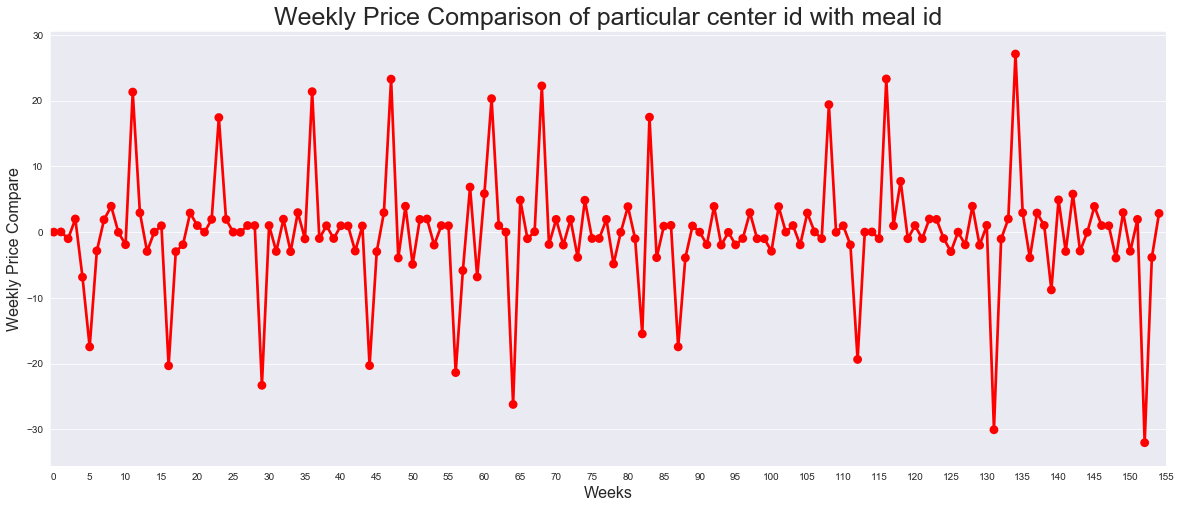

In [23]:
plt.figure(figsize=(20,8))
sns.pointplot(combin[(combin['meal_id']==1062) & (combin['center_id']==67)]['week'], 
         combin[(combin['meal_id']==1062) & (combin['center_id']==67)]['compare_week_price'], color='r');
plt.title('Weekly Price Comparison of particular center id with meal id', fontdict={'fontsize':25})
plt.xticks(range(0, 160, 5), list(np.arange(0,160,5)),rotation=0, )
plt.ylabel('Weekly Price Compare',fontdict={'fontsize':16})
plt.xlabel('Weeks',fontdict={'fontsize':16})


In [24]:
combin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 20 columns):
base_price               489121 non-null float64
center_id                489121 non-null int64
checkout_price           489121 non-null float64
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
id                       489121 non-null int64
meal_id                  489121 non-null int64
num_orders               456548 non-null float64
week                     489121 non-null int64
city_code                489121 non-null int64
region_code              489121 non-null int64
center_type              489121 non-null object
op_area                  489121 non-null float64
category                 489121 non-null object
cuisine                  489121 non-null object
discount amount          489121 non-null float64
discount y/n             489121 non-null int64
discount percent         489121 non-null float64
compare_week_price       489

In [25]:
combin['region_code'].unique()

array([56, 23, 85, 77, 34, 35, 71, 93], dtype=int64)

In [26]:
np.sort(combin['city_code'].unique())

array([456, 461, 473, 478, 485, 515, 517, 522, 526, 541, 553, 556, 561,
       562, 576, 577, 579, 590, 593, 596, 599, 602, 604, 609, 614, 615,
       620, 628, 632, 638, 647, 648, 649, 651, 654, 658, 659, 675, 676,
       679, 680, 683, 685, 693, 695, 698, 699, 700, 702, 703, 713],
      dtype=int64)

In [27]:
combin['city_enc_4'] = combin['city_code'].map({590:'CH1', 526:'CH2', 638:'CH3'})
combin['city_enc_4'] = combin['city_enc_4'].fillna('CH4')

In [28]:
work_data = combin.copy()

In [29]:
work_data.shape

(489121, 21)

In [30]:
work_data['center_id'] = work_data['center_id'].astype('object')
work_data['meal_id'] = work_data['meal_id'].astype('object')
work_data['region_code'] = work_data['region_code'].astype('object')

In [31]:
cat = work_data.select_dtypes('object').columns

In [32]:
num = work_data.select_dtypes(exclude='object').columns

In [33]:
dum = pd.get_dummies(work_data[cat])

In [34]:
work_data = pd.concat([work_data.drop(cat, axis=1), dum], axis=1)

In [36]:
work_data.head()

,base_price,checkout_price,emailer_for_promotion,homepage_featured,id,num_orders,week,city_code,op_area,discount amount,discount y/n,discount percent,compare_week_price,weekly_price_rise y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,181.39,181.39,0,0,1436842,865.0,1,590,6.3,0.0,0,0.000000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,182.36,183.36,0,0,1205013,782.0,2,590,6.3,-1.0,0,-0.548366,1.97,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,182.36,184.36,0,0,1447751,851.0,3,590,6.3,-2.0,0,-1.096732,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,183.36,182.36,0,0,1014968,1202.0,4,590,6.3,1.0,1,0.545375,-2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,181.39,183.39,0,0,10035

In [37]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Columns: 175 entries, base_price to city_enc_4_CH4
dtypes: float64(7), int64(7), uint8(161)
memory usage: 127.3 MB


### Spliting

In [38]:
train_try = work_data[work_data['week'].isin(range(1,136))]
test_try = work_data[work_data['week'].isin(range(136,146))]

In [118]:
train_try['num_orders'].isnull().sum()

0

# Base Model 

In [58]:
base_model = train_try.copy()

In [59]:
from statsmodels.api import OLS, add_constant

In [60]:
base_model.head()

,base_price,checkout_price,emailer_for_promotion,homepage_featured,id,num_orders,week,city_code,op_area,discount amount,discount y/n,discount percent,compare_week_price,weekly_price_rise y/n,center_id_10,center_id_11,center_id_13,center_id_14,center_id_17,center_id_20,center_id_23,center_id_24,center_id_26,center_id_27,center_id_29,center_id_30,center_id_32,center_id_34,center_id_36,center_id_39,center_id_41,center_id_42,center_id_43,center_id_50,center_id_51,center_id_52,center_id_53,center_id_55,center_id_57,center_id_58,center_id_59,center_id_61,center_id_64,center_id_65,center_id_66,center_id_67,center_id_68,center_id_72,center_id_73,center_id_74,center_id_75,center_id_76,center_id_77,center_id_80,center_id_81,center_id_83,center_id_86,center_id_88,center_id_89,center_id_91,center_id_92,center_id_93,center_id_94,center_id_97,center_id_99,center_id_101,center_id_102,center_id_104,center_id_106,center_id_108,center_id_109,center_id_110,center_id_113,center_id_124,center_id_126,center_id_129,center_id_132,center_id_137,center_id_139,center_id_143,center_id_145,center_id_146,center_id_149,center_id_152,center_id_153,center_id_157,center_id_161,center_id_162,center_id_174,center_id_177,center_id_186,meal_id_1062,meal_id_1109,meal_id_1198,meal_id_1207,meal_id_1216,meal_id_1230,meal_id_1247,meal_id_1248,meal_id_1311,meal_id_1438,meal_id_1445,meal_id_1525,meal_id_1543,meal_id_1558,meal_id_1571,meal_id_1727,meal_id_1754,meal_id_1770,meal_id_1778,meal_id_1803,meal_id_1847,meal_id_1878,meal_id_1885,meal_id_1902,meal_id_1962,meal_id_1971,meal_id_1993,meal_id_2104,meal_id_2126,meal_id_2139,meal_id_2290,meal_id_2304,meal_id_2306,meal_id_2322,meal_id_2444,meal_id_2490,meal_id_2492,meal_id_2494,meal_id_2539,meal_id_2569,meal_id_2577,meal_id_2581,meal_id_2631,meal_id_2640,meal_id_2664,meal_id_2704,meal_id_2707,meal_id_2760,meal_id_2826,meal_id_2867,meal_id_2956,region_code_23,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,city_enc_4_CH1,city_enc_4_CH2,city_enc_4_CH3,city_enc_4_CH4
0,181.39,181.39,0,0,1436842,865.0,1,590,6.3,0.0,0,0.000000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,182.36,183.36,0,0,1205013,782.0,2,590,6.3,-1.0,0,-0.548366,1.97,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,182.36,184.36,0,0,1447751,851.0,3,590,6.3,-2.0,0,-1.096732,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,183.36,182.36,0,0,1014968,1202.0,4,590,6.3,1.0,1,0.545375,-2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,181.39,183.39,0,0,10035

In [61]:
base_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423727 entries, 0 to 489120
Columns: 175 entries, base_price to city_enc_4_CH4
dtypes: float64(7), int64(7), uint8(161)
memory usage: 113.6 MB


In [62]:
x = base_model.drop('num_orders', axis=1)
y = base_model['num_orders']

In [63]:
x.shape

(423727, 174)

In [64]:
from statsmodels.api import OLS, add_constant
x_cost = add_constant(x)
model = OLS(y, x_cost).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_orders   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     3027.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:27:10   Log-Likelihood:            -2.9999e+06
No. Observations:              423727   AIC:                         6.000e+06
Df Residuals:                  423590   BIC:                         6.002e+06
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.0682      2.316      8.666      0.000      15.529      24.607
base_price               -0.8105      0.012    -67.131      0.000      -0.834      -0.787
checkout_price            0.2239      0.011     21.236      0.000       0.203       0.245
emailer_for_promotion   269.7300      2.065    130.589      0.000     265.682     273.778
homepage_featured       223.1201      1.619    137.790      0.000     219.946     226.294
id                     1.404e-06   3.06e-06      0.459      0.646   -4.59e-06     7.4e-06
week                     -0.0401      0.012     -3.468      0.001      -0.063      -0.017
city_code                 0.0966      0.007     13.595      0.000       0.083       0.111
op_area                  68.6175      0.513    133.740      0.000      67.612      69.623
discount amount          -1.0344      0.017    -62.344      0.000      -1.067      -1.002
discount y/n            -21.8993      1.072    -20.427      0.000     -24.001     -19.798
discount percent          9.6938      0.102     94.735      0.000       9.493       9.894
compare_week_price       -0.0828      0.012     -6.733      0.000      -0.107      -0.059
weekly_price_rise y/n    -1.4898      1.010     -1.475      0.140      -3.469       0.489
center_id_10              5.7562      3.219      1.788      0.074      -0.553      12.066
center_id_11            161.0833      3.480     46.282      0.000     154.262     167.905
center_id_13            104.5378      3.169     32.990      0.000      98.327     110.749
center_id_14              2.3163      3.630      0.638      0.523      -4.798       9.431
center_id_17            -24.6336      3.594     -6.854      0.000     -31.678     -17.590
center_id_20            -61.0793      3.520    -17.350      0.000     -67.979     -54.179
center_id_23             19.2413      1.740     11.056      0.000      15.830      22.652
center_id_24             90.1439      3.524     25.577      0.000      83.236      97.052
center_id_26             27.1005      3.901      6.948      0.000      19.455      34.746
center_id_27             -8.2806      3.222     -2.570      0.010     -14.596      -1.965
center_id_29            -11.9824      3.710     -3.230      0.001     -19.253      -4.712
center_id_30             24.8023      3.534      7.018      0.000      17.876      31.729
center_id_32              7.9038      3.577      2.209      0.027       0.892      14.915
center_id_34            -29.2233      3.652     -8.002      0.000     -36.381     -22.066
center_id_36            -19.3160      3.399     -5.683      0.000     -25.977     -12.655
center_id_39             25.3989      3.744      6.784      0.000      18.061      32.737
center_id_41            -91.4154      4.185    -21.842      0.000     -99.619     -83.212
center_id_42           

## Assumption of Regression

#Linearity
#Indepedent of errors
#Normality of errors
#Equal variance or Homoscedasticity

In [99]:
import statsmodels.stats.api as sms

In [110]:
# Linearity
# Rainbow :- The Null hypothesis is that the regression is correctly modelled as linear. 
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model, frac=0.6)

(1.0135483017880005, 0.0011989948721125435)

In [107]:
#Indepedent of errors and Autocorrelation
sms.stattools.durbin_watson(model.resid)

0.9435446764341081

In [87]:
# Normality of the residuals
# Jarque-Bera test: The higher the value of Jarque Bera test, 
# the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
(name, test)

(['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis'],
 (1238390117.2905235, 0.0, 9.254282311582056, 267.1971791858343))

In [89]:
# Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model.resid)
(name, test)

(['Chi^2', 'Two-tail probability'],
 NormaltestResult(statistic=653248.3192829399, pvalue=0.0))

In [93]:
# Heteroskedasticity tests
# Breush-Pagan test:

name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
(name, test)

(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'],
 (13510.110547656359, 0.0, 102.57751078879171, 0.0))

In [95]:
# Goldfeld-Quandt test


name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
(name, test)

(['F statistic', 'p-value'],
 (0.9287737351039649, 0.9999999999999999, 'increasing'))

In [111]:
# MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_cost.values, i) for i in range(x_cost.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T

KeyboardInterrupt: 

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [120]:
xtrain = train_try.drop(['id','week','city_code','num_orders'], axis=1)
ytrain = train_try['num_orders']
xtest = test_try.drop(['id','week', 'city_code','num_orders'], axis=1)
ytest = test_try['num_orders']

In [121]:
LinReg = LinearRegression()
LinReg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
LinReg.coef_

array([ 1.98640997e+07, -1.98641003e+07,  2.69646004e+02,  2.23127616e+02,
        8.55646574e+08, -1.98641016e+07, -2.18869617e+01,  9.71566036e+00,
       -8.33886070e-02, -1.51873351e+00, -2.34220421e+09,  8.91817919e+08,
       -2.68446271e+09,  8.61008868e+08,  1.31964097e+09,  6.35123730e+08,
        6.96845830e+08,  1.27003388e+08,  1.12921017e+07, -6.95291044e+08,
       -9.40388870e+08,  1.06294708e+09,  1.17195846e+08, -2.22236013e+08,
        3.45077658e+08, -7.69259531e+08,  4.83972433e+08,  1.79878063e+08,
       -1.36764070e+09, -6.42416264e+08, -1.23890775e+09, -6.81698064e+08,
       -2.55300568e+08,  1.45996142e+09,  1.82421395e+08, -6.73225134e+08,
        4.63994491e+08, -3.85722324e+08, -3.00157715e+08, -7.87836322e+08,
       -1.88883740e+08, -1.18669519e+09, -1.36671356e+08,  5.27141164e+08,
       -1.03319193e+08,  1.93415425e+09, -5.04639070e+08,  5.88178668e+08,
        6.78100729e+07, -1.19254282e+09, -5.39334980e+07, -1.07023952e+09,
       -1.15392319e+09, -

In [122]:
print('Train score :', LinReg.score(xtrain, ytrain))

Train score : 0.49285136919818695


In [123]:
print('Test score :', LinReg.score(xtest, ytest))

Test score : 0.5062857636233542


In [124]:
pred = LinReg.predict(xtest)

In [125]:
print('RMSE :',np.sqrt(mean_squared_error(ytest,pred)))

RMSE : 194.34799664184584


In [126]:
print('ytest mean :',ytest.mean())
print('Unexplained Variation(SSE) :', sum((ytest - pred)**2))
print('RMSE Root Mean Square Error',np.sqrt(sum((ytest - pred)**2)/ytest.size))

ytest mean : 227.302032235459
Unexplained Variation(SSE) : 1239686710.6171038
RMSE Root Mean Square Error 194.34799664184635


In [127]:
print('Explained Variation(SSR)',sum((pred - ytest.mean())**2))

Explained Variation(SSR) 2151837228.2617345


In [128]:
sum((ytest - ytest.mean())**2)

2510939768.9545064

In [129]:
1239686710.6171038 + 2151837228.2617345

3391523938.8788385

In [130]:
print('Variance of Predicted value',sum((pred - pred.mean())**2)/pred.size)
print('Standard Deviation of Predicted value',np.sqrt(sum((pred - pred.mean())**2)/pred.size))

Variance of Predicted value 65369.802381777154
Standard Deviation of Predicted value 255.6751892182289


## Assumption of Regression

In [131]:
#Linearity
#Indepedent of errors
#Normality of errors
#Equal variance or Homoscedasticity

### Residual Analysis

In [132]:
residual = ytest - pred
residual = residual.values

In [133]:
residual

array([ 272.97324181,   55.70242691, -116.15818787, ...,  226.45316029,
       -212.21054363,  214.74953938])

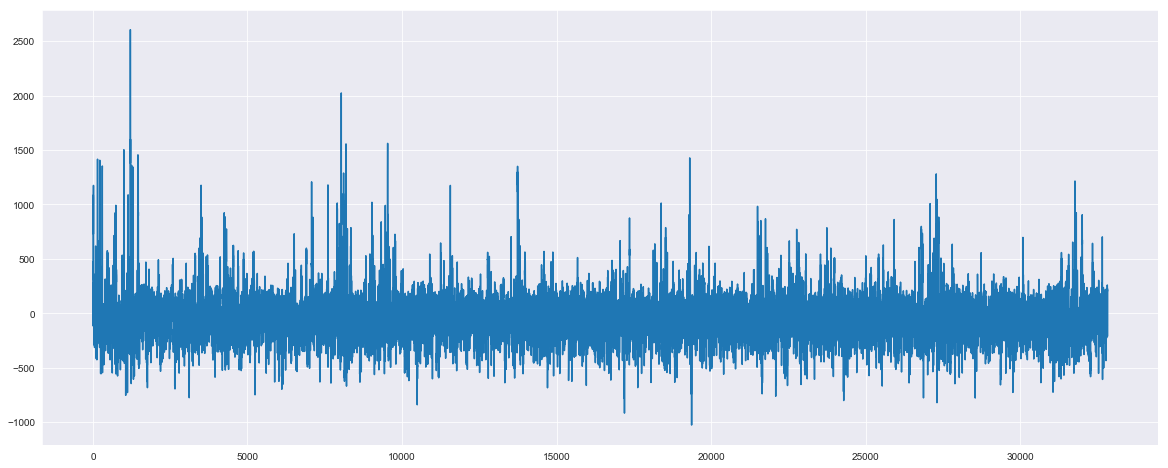

In [136]:
plt.figure(figsize=(20,8))
sns.lineplot(data=residual)

### Linearity

In [ ]:
# plt.figure(figsize=(15,8))
# sns.regplot(ytest, pred, line_kws={'color': 'red'})

In [ ]:
# plt.figure(figsize=(15,8))
# sns.regplot(pred, residual, line_kws={'color': 'red'})

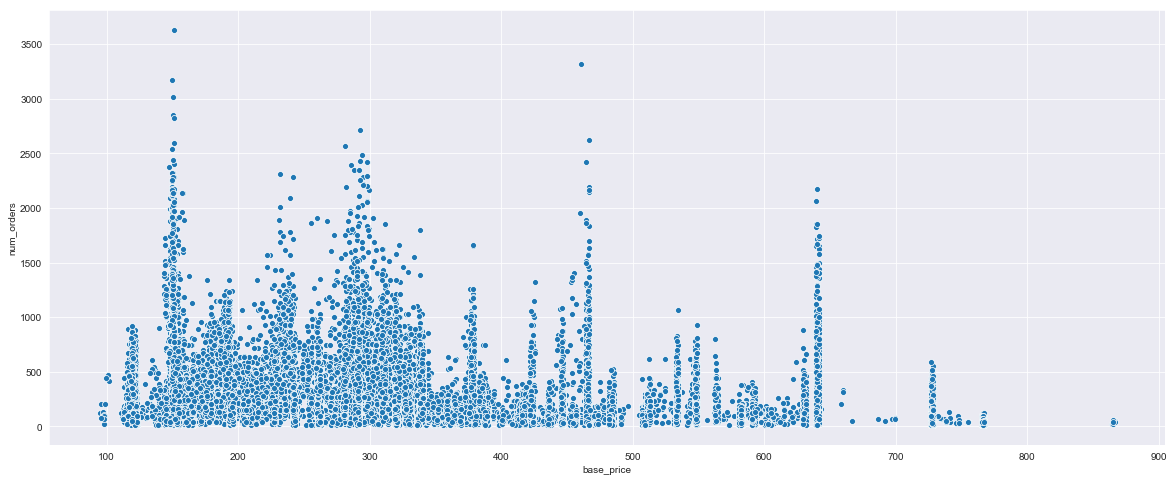

In [137]:
plt.figure(figsize=(20,8))
sns.scatterplot(xtest['base_price'], ytest)

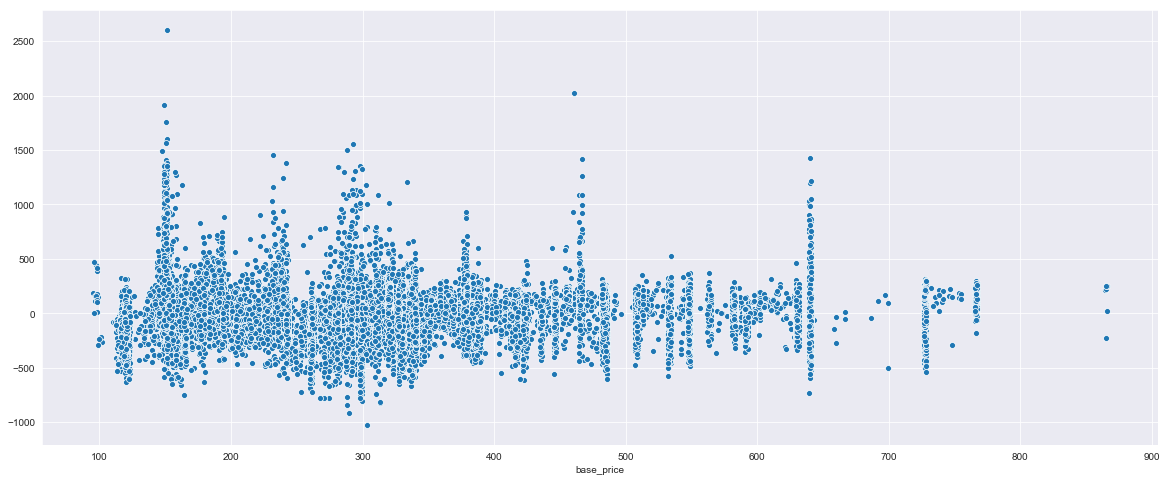

In [138]:
plt.figure(figsize=(20,8))
sns.scatterplot(xtest['base_price'], residual)

### Independence of errors or Autocorrelation

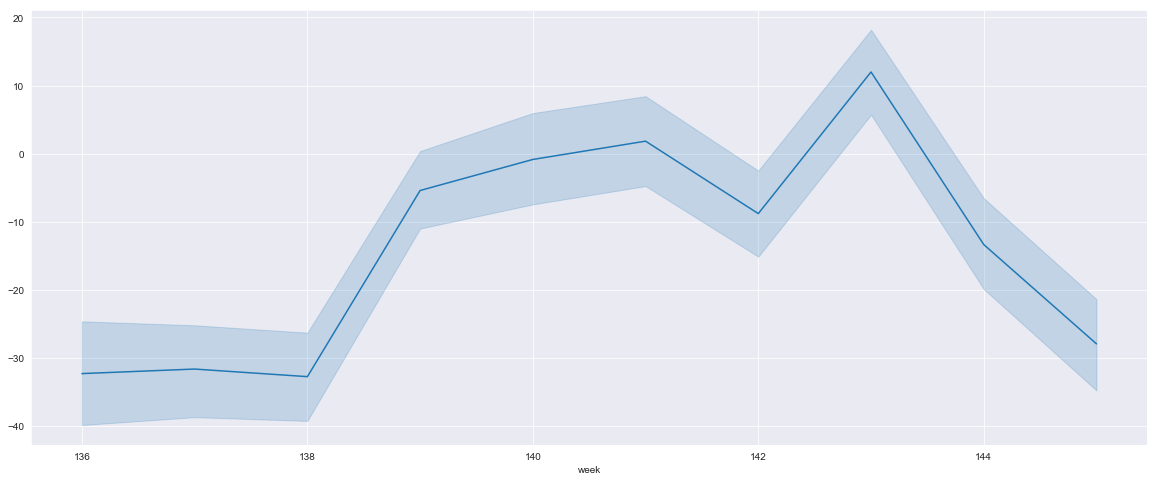

In [140]:
plt.figure(figsize=(20,8))
sns.lineplot(test_try['week'], residual)

### Normality

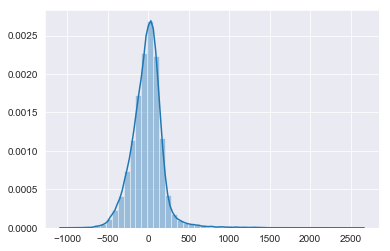

In [142]:
sns.distplot(residual)

In [143]:
#QQ plot

### Equal variance or Homoscedasticity

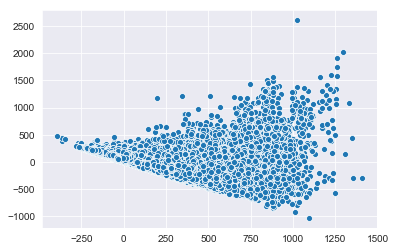

In [144]:
sns.scatterplot(pred, residual)

In [ ]:
# Hetroscedasticity exists

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
work_data = combin.copy()
work_data['center_id'] = work_data['center_id'].astype('object')
work_data['meal_id'] = work_data['meal_id'].astype('object')
work_data['region_code'] = work_data['region_code'].astype('object')

cat = work_data.select_dtypes('object').columns

num = work_data.select_dtypes(exclude='object').columns

dum = pd.get_dummies(work_data[cat])

work_data = pd.concat([work_data.drop(cat, axis=1), dum], axis=1)

In [ ]:
num = ['base_price', 'checkout_price', 'op_area', 'discount amount', 'discount percent', 'compare_week_price']

In [ ]:
std = StandardScaler()

In [ ]:
num_std = pd.DataFrame(std.fit_transform(work_data[['base_price', 'checkout_price', 'op_area', 'discount amount', 'discount percent', 'compare_week_price']])
             ,columns=num)

In [ ]:
work_data.drop(num, axis=1, inplace=True)

In [ ]:
work_data = pd.concat([num_std, work_data], axis=1)

In [ ]:
abs((work_data[num]).skew()).sort_values(ascending=False)

In [ ]:
sns.distplot((work_data['discount amount']))

In [ ]:
# work_data['discount amount'] = np.log(work_data['discount amount'])
# work_data['discount percent'] = np.log(work_data['discount percent'])

In [ ]:
train_try = work_data[work_data['week'].isin(range(1,136))]
test_try = work_data[work_data['week'].isin(range(136,146))]

In [ ]:
xtrain = train_try.drop(['id','week','city_code','num_orders'], axis=1)
ytrain = np.log1p(train_try['num_orders'])
xtest = test_try.drop(['id','week', 'city_code','num_orders'], axis=1)
ytest = np.log1p(test_try['num_orders'])

In [ ]:
LinReg = LinearRegression()
LinReg.fit(xtrain, ytrain)

In [ ]:
print('Train score :', LinReg.score(xtrain, ytrain))

In [ ]:
print('Test score :', LinReg.score(xtest, ytest))

In [ ]:
pred = LinReg.predict(xtest)

In [ ]:
print('RMSE :',np.sqrt(mean_squared_error(ytest,pred)))

In [ ]:
datay = work_data.copy()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# train=datay[datay['week'].isin(range(1,136))]
# test=datay[datay['week'].isin(range(136,146))]


# X_train=train.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
# y_train=np.log1p(train_try['num_orders'])

# X_test=test.drop(['id','num_orders','week','discount amount','city_code'],axis=1)
# y_test=np.log1p(test['num_orders'])

# xgb = XGBRegressor(max_depth = 9,
#     learning_rate=0.5,
#         silent= 1, 
#         objective= 'reg:linear',  
#         eval_metric= 'rmse',
#         seed= 4)

# xgb.fit(X_train,y_train)
# print('Train Score :',xgb.score(X_train,y_train))
# print('Test Score :',xgb.score(X_test,y_test))


In [ ]:
# predictions = xgb.predict(X_test)
# print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))

In [ ]:
# train=datay[datay['week'].isin(range(1,136))]
# test=datay[datay['week'].isin(range(136,146))]


# X_train=train.drop(['id','num_orders','week','discount amount','city_code', 'base_price','discount percent'],axis=1)
# y_train=np.log1p(train_try['num_orders'])

# X_test=test.drop(['id','num_orders','week','discount amount','city_code', 'base_price','discount percent'],axis=1)
# y_test=np.log1p(test['num_orders'])

# xgb = XGBRegressor(max_depth = 9,
#     learning_rate=0.5,
#         silent= 1, 
#         objective= 'reg:linear',  
#         eval_metric= 'rmse',
#         seed= 4)

# xgb.fit(X_train,y_train)
# print('Train Score :',xgb.score(X_train,y_train))
# print('Test Score :',xgb.score(X_test,y_test))


# predictions = xgb.predict(X_test)
# print("RMSLE :",np.sqrt(mean_squared_error(y_test,predictions)))